## What is the most optimal skill to learn for Engineers?

**Methodology**

1. Continue from last notebook to find percent of postings with skill
2. Visualize median salary vs percent skill demand
3. Determine if certain technologies are more prevalent

### Import Libraries and Data

In [2]:
# Importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Clean Data

In [3]:
american_countries = [
    'United States', 'Canada', 'Mexico', 'Brazil', 'Argentina', 'Colombia',
    'Chile', 'Peru', 'Venezuela', 'Ecuador', 'Bolivia', 'Paraguay',
    'Uruguay', 'Guyana', 'Suriname', 'Panama', 'Costa Rica', 'Guatemala',
    'Honduras', 'Nicaragua', 'El Salvador', 'Belize', 'Cuba', 'Haiti',
    'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Bahamas'
]

df_DE_america = df[(df['job_title_short'].str.contains('Engineer')) & (df['job_country'].isin(american_countries))].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DE_america = df_DE_america.dropna(subset=['salary_year_avg'])

df_DE_america_exploded = df_DE_america.explode('job_skills')

df_DE_america_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
92,120000.0,sql
92,120000.0,python
146,129500.0,golang
146,129500.0,scala
146,129500.0,python


### Calculate Percent of Job Postings that Have Skills

In [4]:
# Using df_DE to find the count of skills and also the median salary for each skill
df_DE_skills = df_DE_america_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DE_skills = df_DE_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DE_job_count = len(df_DE_america)

df_DE_skills['skill_percent'] = df_DE_skills['skill_count'] / DE_job_count * 100

df_DE_skills = df_DE_skills[df_DE_skills['skill_count'] > 0]

df_DE_skills

,skill_count,median_salary,skill_percent
job_skills,,,
python,3278,135600.0,68.706770
sql,3237,130000.0,67.847411
aws,2236,140000.0,46.866485
spark,1643,143000.0,34.437225
azure,1581,131100.0,33.137707
...,...,...,...
openstack,1,130800.0,0.020960
suse,1,125000.0,0.020960
svelte,1,90000.0,0.020960


### Median Salary vs Percent Skill Demand

In [5]:
skill_limit = 10

df_DE_skills_high_demand = df_DE_skills[df_DE_skills['skill_percent'] > skill_limit]

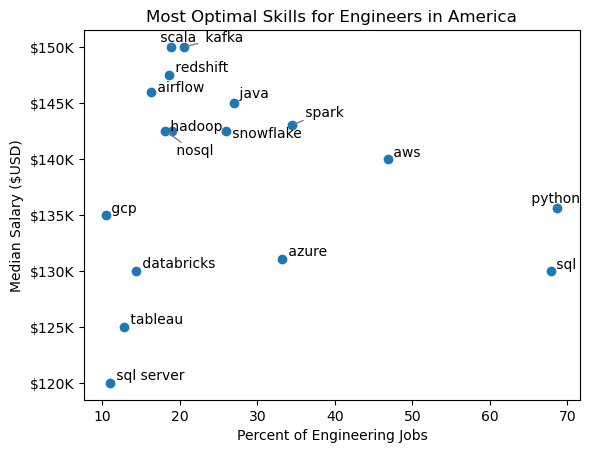

In [6]:
from adjustText import adjust_text

plt.scatter(df_DE_skills_high_demand['skill_percent'], df_DE_skills_high_demand['median_salary'])
plt.xlabel('Percent of Engineering Jobs')
plt.ylabel('Median Salary ($USD)')
plt.title('Most Optimal Skills for Engineers in America')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

texts = []
for i, txt in enumerate(df_DE_skills_high_demand.index):
    texts.append(plt.text(df_DE_skills_high_demand['skill_percent'].iloc[i], df_DE_skills_high_demand['median_salary'].iloc[i], " " + txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

### Coloring by Technology

In [7]:
df_technology = df['job_type_skills'].copy()

# Remove duplicates
df_technology = df_technology.drop_duplicates()

# Remove NaN values
df_technology = df_technology.dropna()

# Combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row) # Convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict: # If key already exists in techonolgy_dict, add value to existing value
            technology_dict[key] += value
        else:
            technology_dict[key] = value

# Remove duplicates by converting values to set them back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['cognos',
  'looker',
  'alteryx',
  'spss',
  'datarobot',
  'sheets',
  'ssis',
  'sas',
  'spreadsheet',
  'excel',
  'powerbi',
  'visio',
  'ssrs',
  'nuix',
  'power bi',
  'tableau',
  'sap',
  'sharepoint',
  'word',
  'qlik',
  'powerpoint',
  'microstrategy',
  'dax',
  'outlook',
  'splunk',
  'ms access',
  'msaccess',
  'esquisse'],
 'programming': ['ruby',
  'mongo',
  'shell',
  'crystal',
  'cobol',
  'javascript',
  'go',
  'sql',
  't-sql',
  'c++',
  'typescript',
  'sas',
  'matlab',
  'no-sql',
  'r',
  'kotlin',
  'assembly',
  'bash',
  'rust',
  'sass',
  'objective-c',
  'f#',
  'dart',
  'swift',
  'mongodb',
  'python',
  'golang',
  'groovy',
  'css',
  'julia',
  'c#',
  'c',
  'clojure',
  'vba',
  'apl',
  'fortran',
  'visualbasic',
  'html',
  'nosql',
  'vb.net',
  'powershell',
  'php',
  'visual basic',
  'perl',
  'pascal',
  'haskell',
  'lisp',
  'elixir',
  'solidity',
  'lua',
  'erlang',
  'java',
  'delphi',
  'scala',
  'oc

In [8]:
# Turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,cognos
0,analyst_tools,looker
0,analyst_tools,alteryx
0,analyst_tools,spss
0,analyst_tools,datarobot
...,...,...
9,sync,microsoft teams
9,sync,slack
9,sync,unify
9,sync,zoom


In [9]:
# Merge df_DE_skills and df_technology
df_DE_skills_tech = df_DE_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_DE_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,3278,135600.0,68.706770,programming,python
1,3237,130000.0,67.847411,programming,sql
2,2236,140000.0,46.866485,cloud,aws
3,1643,143000.0,34.437225,libraries,spark
4,1581,131100.0,33.137707,cloud,azure
...,...,...,...,...,...
192,1,130800.0,0.020960,cloud,openstack
193,1,125000.0,0.020960,os,suse
194,1,90000.0,0.020960,webframeworks,svelte
195,1,57500.0,0.020960,libraries,tidyverse


In [10]:
df_DE_skills_tech_high_demand = df_DE_skills_tech[df_DE_skills_tech['skill_percent'] > skill_limit]

df_DE_skills_tech_high_demand

,skill_count,median_salary,skill_percent,technology,skills
0,3278,135600.0,68.706770,programming,python
1,3237,130000.0,67.847411,programming,sql
2,2236,140000.0,46.866485,cloud,aws
3,1643,143000.0,34.437225,libraries,spark
4,1581,131100.0,33.137707,cloud,azure
5,1286,145000.0,26.954517,programming,java
6,1236,142500.0,25.906519,cloud,snowflake
7,977,150000.0,20.477887,libraries,kafka
8,905,142500.0,18.968770,libraries,hadoop
9,897,150000.0,18.801090,programming,scala


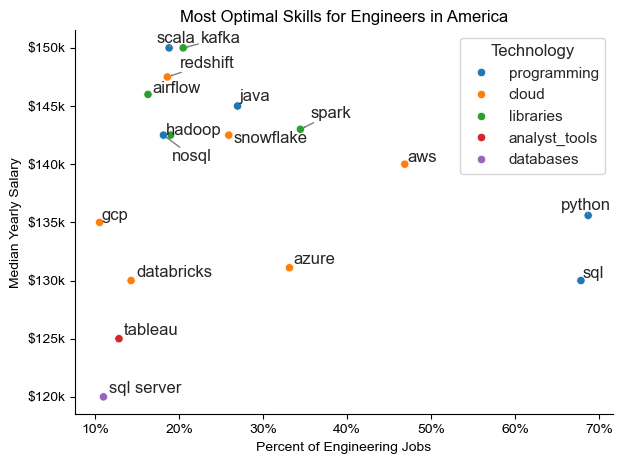

In [11]:
sns.scatterplot(
    data=df_DE_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DE_skills_high_demand.index):
    texts.append(plt.text(df_DE_skills_high_demand['skill_percent'].iloc[i], df_DE_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title and legend
plt.xlabel('Percent of Engineering Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Engineers in America')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()